In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
folder = 'D:/Data_Analyst_Projet/Projet 9/Donnees/donnees en plus/'
folder2 = 'D:/Data_Analyst_Projet/Projet 9/Donnees/'

In [3]:
pd.options.display.float_format = '{:,.2f}'.format

## Fichier Disponibilité alimentaire

On va chercher les données qui nous intéresse dans le fichier disponibilité alimentaire.

L'objectif est d'avoir une vision mondiale de la viande de Volaille et d'extraire les indicateurs importants dans ce domaine.

Je vais agréger les données par pays, pour avoir des informations pour chaque pays sur :
- l'importation de volaille, 
- la part de l'importation par rapport à ce qui est consommé,
- la part de la production par rapport à ce qui est consommé, 
- la proportion de la volaille dans la nourriture, 
- la proportion d'animaux dans la nourriture.

Les données sont en milliers de tonnes.

In [4]:
df = pd.read_csv(folder2+'DisponibiliteAlimentaire_2017.csv')
df.head()

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole
0,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5511,Production,2511,Blé et produits,2017,2017,Milliers de tonnes,"4,281.00",S,Données standardisées
1,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5611,Importations - Quantité,2511,Blé et produits,2017,2017,Milliers de tonnes,"2,302.00",S,Données standardisées
2,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5072,Variation de stock,2511,Blé et produits,2017,2017,Milliers de tonnes,-119.00,S,Données standardisées
3,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5911,Exportations - Quantité,2511,Blé et produits,2017,2017,Milliers de tonnes,0.00,S,Données standardisées
4,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5301,Disponibilité intérieure,2511,Blé et produits,2017,2017,Milliers de tonnes,"6,701.00",S,Données standardisées


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176600 entries, 0 to 176599
Data columns (total 14 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Code Domaine            176600 non-null  object 
 1   Domaine                 176600 non-null  object 
 2   Code zone               176600 non-null  int64  
 3   Zone                    176600 non-null  object 
 4   Code Élément            176600 non-null  int64  
 5   Élément                 176600 non-null  object 
 6   Code Produit            176600 non-null  int64  
 7   Produit                 176600 non-null  object 
 8   Code année              176600 non-null  int64  
 9   Année                   176600 non-null  int64  
 10  Unité                   176600 non-null  object 
 11  Valeur                  176600 non-null  float64
 12  Symbole                 176600 non-null  object 
 13  Description du Symbole  176600 non-null  object 
dtypes: float64(1), int64

In [6]:
dispo_alim = df.copy()

In [7]:
# on garde que la viande de volaille et les colonnes pertinentes
dispo_poulet = dispo_alim[dispo_alim['Produit']=='Viande de Volailles'][['Zone', 'Élément', 'Valeur']].reset_index(drop=True)
dispo_poulet = pd.pivot_table(dispo_poulet, columns='Élément', index='Zone', values='Valeur').reset_index()

In [8]:
# renommage colonne
dispo_poulet.rename(columns={'Zone' : 'pays'}, inplace=True)

In [9]:
dispo_poulet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172 entries, 0 to 171
Data columns (total 18 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   pays                                                           172 non-null    object 
 1   Alimentation pour touristes                                    78 non-null     float64
 2   Aliments pour animaux                                          1 non-null      float64
 3   Autres utilisations (non alimentaire)                          34 non-null     float64
 4   Disponibilité alimentaire (Kcal/personne/jour)                 172 non-null    float64
 5   Disponibilité alimentaire en quantité (kg/personne/an)         172 non-null    float64
 6   Disponibilité de matière grasse en quantité (g/personne/jour)  172 non-null    float64
 7   Disponibilité de protéines en quantité (g/personne/jour)      

In [10]:
# création de la variable taux de dépendance, part importation par rapport à ce qui est consommé
dispo_poulet['taux_dependance'] = dispo_poulet['Importations - Quantité']/dispo_poulet['Disponibilité intérieure']
# création de la variable taux d'autosuffisance', part production par rapport à ce qui est consommé
dispo_poulet['taux_autosuffisance'] = dispo_poulet['Production']/dispo_poulet['Disponibilité intérieure']

In [11]:
# nourriture totale par pays
nourriture = dispo_alim[dispo_alim['Élément']=='Nourriture'].groupby('Zone')[['Valeur']].sum().reset_index()

nourriture.rename(columns={'Zone':'pays', 'Valeur':'nourriture_totale'}, inplace=True)

dispo_poulet = dispo_poulet.merge(nourriture, how='left', on='pays')

In [12]:
# création de la variable part de la volaille dans la nourriture du pays
dispo_poulet['proportion_volaille_nourriture'] = dispo_poulet['Nourriture']/dispo_poulet['nourriture_totale']

In [13]:
# part produit animaux

# liste des produits animaux, viandes, poissons ou fruits de mer
produits_animaux = ['Viande de Bovins',
       "Viande d'Ovins/Caprins", 'Viande de Suides',
       'Viande de Volailles', 'Viande, Autre', 'Abats Comestible',
       'Poissons Eau Douce','Poissons Pelagiques', 'Poissons Marins, Autres', 'Crustacés',
       'Cephalopodes', 'Mollusques, Autres', 'Animaux Aquatiques Autre',
       'Viande de Anim Aquatiq']

# Consommation de la nourriture animale : animaux, viandes, poissons ou fruits de mer 
A = dispo_alim[dispo_alim.Produit.isin(produits_animaux)]
consommation_produits_animaux = A[A['Élément']=='Nourriture'].groupby('Zone')[['Valeur']].sum().reset_index()

# renommage
consommation_produits_animaux.rename(columns={'Zone':'pays', 'Valeur':'nourriture_produits_animaux'}, inplace=True)

# jointure
dispo_poulet = dispo_poulet.merge(consommation_produits_animaux, how='left', on='pays')

# création du champs part animaux dans la nourriture du pays
dispo_poulet['proportion_animaux_nourriture'] = dispo_poulet['nourriture_produits_animaux']/dispo_poulet['nourriture_totale']

In [14]:
dispo_poulet[dispo_poulet.isna().any(axis=1)]

,pays,Alimentation pour touristes,Aliments pour animaux,Autres utilisations (non alimentaire),Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,...,Résidus,Semences,Traitement,Variation de stock,taux_dependance,taux_autosuffisance,nourriture_totale,proportion_volaille_nourriture,nourriture_produits_animaux,proportion_animaux_nourriture
0,Afghanistan,NaN,NaN,NaN,5.00,1.53,0.33,0.54,57.00,NaN,...,0.00,NaN,NaN,0.00,0.51,0.49,"12,968.00",0.00,374.00,0.03
1,Afrique du Sud,0.00,NaN,NaN,143.00,35.69,9.25,14.11,"2,118.00",63.00,...,0.00,NaN,NaN,0.00,0.24,0.79,"31,726.00",0.06,"3,902.00",0.12
2,Albanie,NaN,NaN,NaN,85.00,16.36,6.45,6.26,47.00,0.00,...,0.00,NaN,NaN,4.00,0.81,0.28,"3,631.00",0.01,165.00,0.05
3,Algérie,0.00,NaN,NaN,22.00,6.38,1.50,1.97,277.00,0.00,...,0.00,NaN,NaN,0.00,0.01,0.99,"33,056.00",0.01,948.00,0.03
4,Allemagne,NaN,NaN,NaN,71.00,19.47,4.16,7.96,"1,739.00",646.00,...,-38.00,NaN,167.00,-29.00,0.48,0.87,"77,988.00",0.02,"8,100.00",0.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167,Émirats arabes unis,NaN,NaN,NaN,147.00,43.47,9.25,14.80,412.00,94.00,...,0.00,NaN,NaN,-26.00,1.05,0.12,"5,958.00",0.07,768.00,0.13
168,Équateur,0.00,NaN,NaN,83.00,19.31,6.35,6.15,341.00,0.00,...,0.00,NaN,NaN,-1.00,0.00,1.00,"9,465.00",0.03,896.00,0.09
169,États-Unis d'Amérique,NaN,NaN,89.00,219.00,55.68,14.83,19.93,"18,266.00","3,692.00",...,0.00,NaN,77.00,80.00,0.01,1.20,"322,036.00",0.06,"46,267.00",0.14
170,Éthiopie,0.00,NaN,NaN,0.00,0.13,0.03,0.04,14.00,NaN,...,0.00,NaN,NaN,0.00,0.07,1.00,"38,502.00",0.00,730.00,0.02


In [15]:
# on garde uniquement les variables qui nous intéresse
data = dispo_poulet[['pays', 'Importations - Quantité', 'Nourriture', 'taux_dependance',
             'taux_autosuffisance','proportion_volaille_nourriture','proportion_animaux_nourriture']]

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 172 entries, 0 to 171
Data columns (total 7 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   pays                            172 non-null    object 
 1   Importations - Quantité         170 non-null    float64
 2   Nourriture                      170 non-null    float64
 3   taux_dependance                 170 non-null    float64
 4   taux_autosuffisance             168 non-null    float64
 5   proportion_volaille_nourriture  170 non-null    float64
 6   proportion_animaux_nourriture   172 non-null    float64
dtypes: float64(6), object(1)
memory usage: 10.8+ KB


In [17]:
# on a trop peu d'informations pour ces pays, on ne les prends par en compte dans l'analyse
data[data.isna().any(axis=1)]

,pays,Importations - Quantité,Nourriture,taux_dependance,taux_autosuffisance,proportion_volaille_nourriture,proportion_animaux_nourriture
43,Djibouti,3.00,3.00,1.00,NaN,0.01,0.05
92,Maldives,12.00,7.00,1.00,NaN,0.03,0.22
113,Ouzbékistan,NaN,NaN,NaN,NaN,NaN,1.00
130,République démocratique populaire lao,NaN,NaN,NaN,NaN,NaN,1.00


In [18]:
# on supprime les lignes ci-dessus
data = data.drop(data[data.isna().any(axis=1)].index).reset_index(drop=True)

<Figure size 1500x900 with 0 Axes>

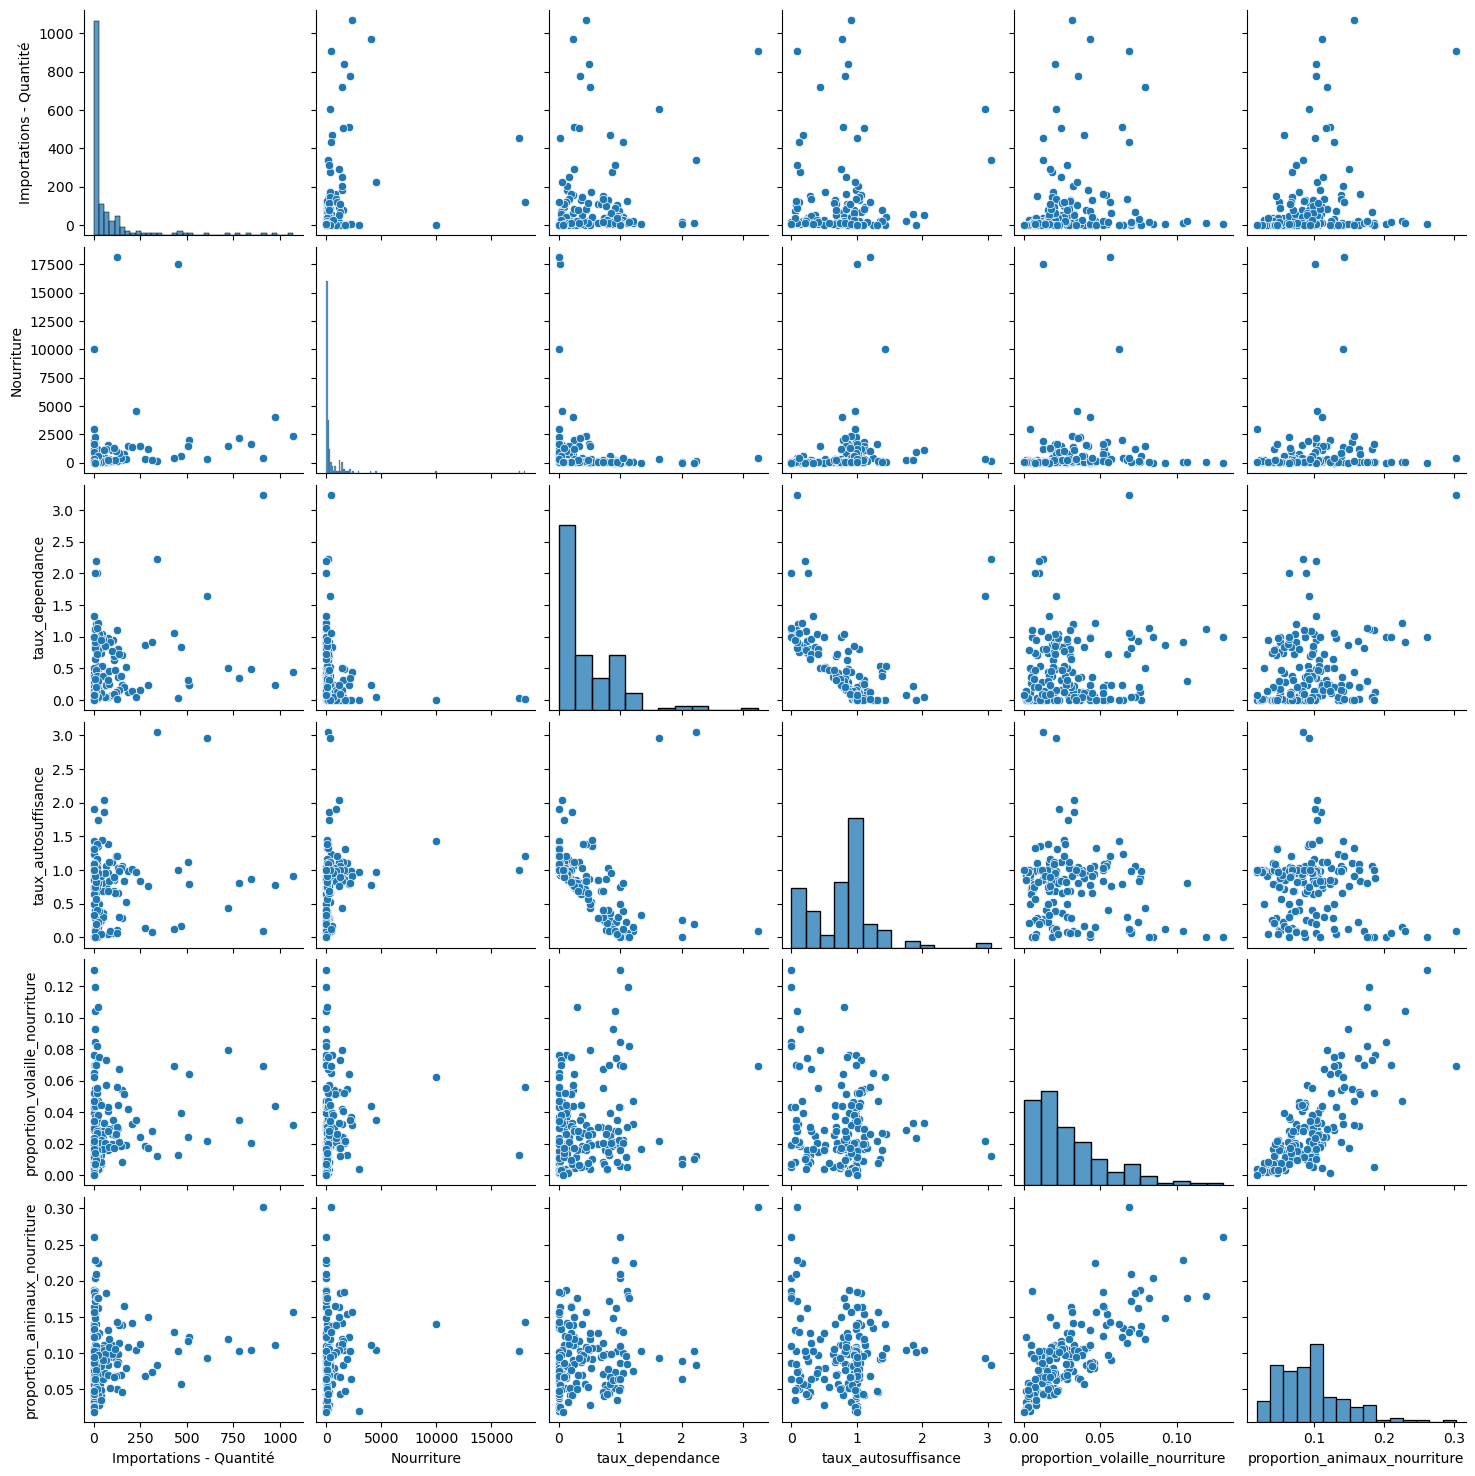

In [19]:
plt.figure(figsize=(15,9))

sns.pairplot(data)

plt.show()

## Fichier Population

On va extraire du fichier la population de 2017 (l'année représentée dans disponibilité alimentaire) de chaque pays et le taux d'accroissement de la population.

Un pays qui a un taux d'accroissement de la population fort est un pays avec de futurs potentiels clients, on observera donc cette variable dans l'analyse.

In [20]:
df2 = pd.read_csv(folder2+'Population_2000_2018.csv')
df2.head()

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
0,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2000,2000,1000 personnes,"20,779.95",X,Sources internationales sûres,NaN
1,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2001,2001,1000 personnes,"21,606.99",X,Sources internationales sûres,NaN
2,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2002,2002,1000 personnes,"22,600.77",X,Sources internationales sûres,NaN
3,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2003,2003,1000 personnes,"23,680.87",X,Sources internationales sûres,NaN
4,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2004,2004,1000 personnes,"24,726.68",X,Sources internationales sûres,NaN


In [21]:
population = df2.copy()

In [22]:
population = population.pivot_table(index='Zone', columns='Année', values='Valeur').reset_index()

In [23]:
population.head()

Année,Zone,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Afghanistan,"20,779.95","21,606.99","22,600.77","23,680.87","24,726.68","25,654.28","26,433.05","27,100.54","27,722.28","28,394.81","29,185.51","30,117.41","31,161.38","32,269.59","33,370.79","34,413.60","35,383.03","36,296.11","37,171.92"
1,Afrique du Sud,"44,967.71","45,571.27","46,150.91","46,719.20","47,291.61","47,880.60","48,489.46","49,119.76","49,779.47","50,477.01","51,216.96","52,003.75","52,832.66","53,687.12","54,544.19","55,386.37","56,207.65","57,009.76","57,792.52"
2,Albanie,"3,129.24","3,129.70","3,126.19","3,118.02","3,104.89","3,086.81","3,063.02","3,034.00","3,002.68","2,973.05","2,948.02","2,928.59","2,914.10","2,903.79","2,896.30","2,890.51","2,886.44","2,884.17","2,882.74"
3,Algérie,"31,042.24","31,451.51","31,855.11","32,264.16","32,692.16","33,149.72","33,641.00","34,166.97","34,730.61","35,333.88","35,977.46","36,661.44","37,383.89","38,140.13","38,923.69","39,728.03","40,551.39","41,389.19","42,228.41"
4,Allemagne,"81,400.88","81,453.88","81,535.12","81,614.38","81,646.47","81,602.74","81,472.23","81,277.83","81,065.75","80,899.96","80,827.00","80,855.63","80,972.63","81,174.37","81,450.38","81,787.41","82,193.77","82,658.41","83,124.42"


In [24]:
# des valeurs nulles à traiter pour créer de nouvelles variables
population[population.isna().any(axis=1)]

Année,Zone,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
26,"Bonaire, Saint-Eustache et Saba",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.99,22.84,23.50,24.07,24.57,25.02,25.40,25.71
52,Curaçao,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,152.31,154.82,156.79,158.42,159.85,161.05,162.00,162.75
125,Monténégro,NaN,NaN,NaN,NaN,NaN,NaN,617.86,619.55,621.32,622.94,624.27,625.27,625.92,626.35,626.64,626.96,627.26,627.56,627.81
169,Saint-Barthélemy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.34,9.44,9.54,9.62,9.69,9.75,9.78,9.82
172,Saint-Martin (partie française),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37.45,37.01,36.45,36.02,35.86,36.06,36.56,37.26
181,Serbie,NaN,NaN,NaN,NaN,NaN,NaN,"9,145.91","9,101.18","9,060.10","9,023.36","8,991.25","8,963.77","8,940.11","8,918.90","8,898.29","8,876.78","8,853.96","8,829.63","8,802.75"
182,Serbie-et-Monténégro,"10,101.17","10,023.94","9,959.84","9,906.31","9,857.77","9,810.22",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
186,Sint Maarten (partie néerlandaise),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.06,36.24,37.58,38.88,39.97,40.81,41.44,41.94
190,Soudan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"36,193.78","37,072.55","37,977.65","38,902.95","39,847.44","40,813.40","41,801.53"
191,Soudan (ex),"33,474.41","34,418.88","35,393.00","36,396.19","37,427.54","38,485.45","39,569.23","40,675.76","41,797.78","42,926.05","44,053.38","45,180.38",NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
colonne_date = [2000,   2001,   2002,   2003,   2004,   2005,   2006,   2007,
         2008,   2009,   2010,   2011,   2012,   2013,   2014,   2015,   2016,
         2017,   2018]

# on remplace les valeurs nulles par l'interpolation de la ligne, en l'occurence, on étant la dernière valeur
population.loc[population.isna().any(axis=1),colonne_date] = population[population.isna().any(axis=1)].drop(columns='Zone').interpolate(method='linear', axis=1, limit_direction='both')

In [26]:
# création de la variables accroissement par année
population['accroissement_moyen_par_annee'] = (population[2018]-population[2000])/19

In [27]:
# calcul des taux d'accroissement 
population['ta_1']=population['accroissement_moyen_par_annee']/population[2016]
population['ta_2']=population['accroissement_moyen_par_annee']/population[2017]
population['ta_3']=population['accroissement_moyen_par_annee']/population[2018]

population['taux_accroissement_moyen'] = (population['ta_1']+population['ta_2']+population['ta_3'])/3

In [28]:
population.head()

Année,Zone,2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2014,2015,2016,2017,2018,accroissement_moyen_par_annee,ta_1,ta_2,ta_3,taux_accroissement_moyen
0,Afghanistan,"20,779.95","21,606.99","22,600.77","23,680.87","24,726.68","25,654.28","26,433.05","27,100.54","27,722.28",...,"33,370.79","34,413.60","35,383.03","36,296.11","37,171.92",862.74,0.02,0.02,0.02,0.02
1,Afrique du Sud,"44,967.71","45,571.27","46,150.91","46,719.20","47,291.61","47,880.60","48,489.46","49,119.76","49,779.47",...,"54,544.19","55,386.37","56,207.65","57,009.76","57,792.52",674.99,0.01,0.01,0.01,0.01
2,Albanie,"3,129.24","3,129.70","3,126.19","3,118.02","3,104.89","3,086.81","3,063.02","3,034.00","3,002.68",...,"2,896.30","2,890.51","2,886.44","2,884.17","2,882.74",-12.97,-0.00,-0.00,-0.00,-0.00
3,Algérie,"31,042.24","31,451.51","31,855.11","32,264.16","32,692.16","33,149.72","33,641.00","34,166.97","34,730.61",...,"38,923.69","39,728.03","40,551.39","41,389.19","42,228.41",588.75,0.01,0.01,0.01,0.01
4,Allemagne,"81,400.88","81,453.88","81,535.12","81,614.38","81,646.47","81,602.74","81,472.23","81,277.83","81,065.75",...,"81,450.38","81,787.41","82,193.77","82,658.41","83,124.42",90.71,0.00,0.00,0.00,0.00


In [29]:
population.rename(columns={'Zone' : 'pays'}, inplace=True)

In [30]:
population2 = population[['pays', 2017, 'accroissement_moyen_par_annee', 'taux_accroissement_moyen']]

In [31]:
population.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238 entries, 0 to 237
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   pays                           238 non-null    object 
 1   2000                           238 non-null    float64
 2   2001                           238 non-null    float64
 3   2002                           238 non-null    float64
 4   2003                           238 non-null    float64
 5   2004                           238 non-null    float64
 6   2005                           238 non-null    float64
 7   2006                           238 non-null    float64
 8   2007                           238 non-null    float64
 9   2008                           238 non-null    float64
 10  2009                           238 non-null    float64
 11  2010                           238 non-null    float64
 12  2011                           238 non-null    flo

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 7 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   pays                            168 non-null    object 
 1   Importations - Quantité         168 non-null    float64
 2   Nourriture                      168 non-null    float64
 3   taux_dependance                 168 non-null    float64
 4   taux_autosuffisance             168 non-null    float64
 5   proportion_volaille_nourriture  168 non-null    float64
 6   proportion_animaux_nourriture   168 non-null    float64
dtypes: float64(6), object(1)
memory usage: 9.3+ KB


In [33]:
A = population['pays'].unique()
B = data['pays'].unique()
liste = []
for pays in B :
    if pays not in A : print(pays), liste.append(pays)

print(len(liste))

0


In [34]:
A = population['pays'].unique()
B = data['pays'].unique()
liste = []
for pays in A :
    if pays not in B : print(pays), liste.append(pays)

print(len(liste))

Andorre
Anguilla
Antilles néerlandaises (ex)
Aruba
Bahreïn
Bermudes
Bhoutan
Bonaire, Saint-Eustache et Saba
Brunéi Darussalam
Burundi
Comores
Curaçao
Djibouti
Gibraltar
Groenland
Guadeloupe
Guam
Guinée équatoriale
Guyane française
Libye
Liechtenstein
Maldives
Martinique
Mayotte
Micronésie (États fédérés de)
Monaco
Montserrat
Nauru
Nioué
Ouzbékistan
Palaos
Palestine
Papouasie-Nouvelle-Guinée
Porto Rico
Qatar
République arabe syrienne
République démocratique du Congo
République démocratique populaire lao
Réunion
Sahara occidental
Saint-Barthélemy
Saint-Marin
Saint-Martin (partie française)
Saint-Pierre-et-Miquelon
Saint-Siège
Sainte-Hélène, Ascension et Tristan da Cunha
Samoa américaines
Serbie-et-Monténégro
Seychelles
Singapour
Sint Maarten  (partie néerlandaise)
Somalie
Soudan (ex)
Soudan du Sud
Tokélaou
Tonga
Tuvalu
Érythrée
Île de Man
Îles Anglo-Normandes
Îles Caïmanes
Îles Cook
Îles Falkland (Malvinas)
Îles Féroé
Îles Mariannes du Nord
Îles Marshall
Îles Turques-et-Caïques
Îles Vier

On a 70 pays du fichier population qui ne sont pas représentés dans data, les données provenant de disponibilité alimentaire où il y les informations sur la consommation de volaille de chaque pays. On garde donc uniquement les 168 pays où nous avons des informations sur les consommations de volaille dans la suite de l'analyse.

In [35]:
data = data.merge(population2, how='left', on='pays')

In [36]:
data

,pays,Importations - Quantité,Nourriture,taux_dependance,taux_autosuffisance,proportion_volaille_nourriture,proportion_animaux_nourriture,2017,accroissement_moyen_par_annee,taux_accroissement_moyen
0,Afghanistan,29.00,55.00,0.51,0.49,0.00,0.03,"36,296.11",862.74,0.02
1,Afrique du Sud,514.00,"2,035.00",0.24,0.79,0.06,0.12,"57,009.76",674.99,0.01
2,Albanie,38.00,47.00,0.81,0.28,0.01,0.05,"2,884.17",-12.97,-0.00
3,Algérie,2.00,264.00,0.01,0.99,0.01,0.03,"41,389.19",588.75,0.01
4,Allemagne,842.00,"1,609.00",0.48,0.87,0.02,0.10,"82,658.41",90.71,0.00
...,...,...,...,...,...,...,...,...,...,...
163,Émirats arabes unis,433.00,412.00,1.05,0.12,0.07,0.13,"9,487.20",341.94,0.04
164,Équateur,0.00,324.00,0.00,1.00,0.03,0.09,"16,785.36",231.75,0.01
165,États-Unis d'Amérique,123.00,"18,100.00",0.01,1.20,0.06,0.14,"325,084.76","2,388.70",0.01
166,Éthiopie,1.00,14.00,0.07,1.00,0.00,0.02,"106,399.92","2,263.14",0.02


In [37]:
data.columns = ['pays','importation_volaille', 'nourriture', 'taux_dependance','taux_autosuffisance',
 'proportion_volaille_nourriture', 'proportion_animaux_nourriture',
  'population', 'accroissement_population_moyen_par_annee', 'taux_accroissement_population_moyen']

In [38]:
data

,pays,importation_volaille,nourriture,taux_dependance,taux_autosuffisance,proportion_volaille_nourriture,proportion_animaux_nourriture,population,accroissement_population_moyen_par_annee,taux_accroissement_population_moyen
0,Afghanistan,29.00,55.00,0.51,0.49,0.00,0.03,"36,296.11",862.74,0.02
1,Afrique du Sud,514.00,"2,035.00",0.24,0.79,0.06,0.12,"57,009.76",674.99,0.01
2,Albanie,38.00,47.00,0.81,0.28,0.01,0.05,"2,884.17",-12.97,-0.00
3,Algérie,2.00,264.00,0.01,0.99,0.01,0.03,"41,389.19",588.75,0.01
4,Allemagne,842.00,"1,609.00",0.48,0.87,0.02,0.10,"82,658.41",90.71,0.00
...,...,...,...,...,...,...,...,...,...,...
163,Émirats arabes unis,433.00,412.00,1.05,0.12,0.07,0.13,"9,487.20",341.94,0.04
164,Équateur,0.00,324.00,0.00,1.00,0.03,0.09,"16,785.36",231.75,0.01
165,États-Unis d'Amérique,123.00,"18,100.00",0.01,1.20,0.06,0.14,"325,084.76","2,388.70",0.01
166,Éthiopie,1.00,14.00,0.07,1.00,0.00,0.02,"106,399.92","2,263.14",0.02


## Ajoût d'autres fichiers

Pour améliorer dans étude de marché, on intègre d'autres données à notre dataset.

On intègre des données politiques, économiques, sociales, technologiques et réglementaires en suivant les principes de l'analyse Pestel.

Les nouveaux indicateurs sont : 
- Le LPI (indicateur de performance logistique)
- Le PIB
- Le taux de droit de douane
- Le taux de population urbaine
- Le nombre de conteneurs à l'année
- L'indicateur de stabilité politique
- Le coût de production du poulet

### LPI

In [39]:
lpi = pd.read_excel(folder+'lpi.xls')
lpi.head()

,pays,lpi
0,Aruba,2.49
1,Afghanistan,1.95
2,Angola,2.05
3,Albanie,2.66
4,Andorre,NaN


In [40]:
lpi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   pays    264 non-null    object 
 1   lpi     206 non-null    float64
dtypes: float64(1), object(1)
memory usage: 4.2+ KB


In [41]:
lpi[lpi.isna().any(axis=1)]

,pays,lpi
4,Andorre,NaN
9,Samoa américaines,NaN
10,Antigua-et-Barbuda,NaN
13,Azerbaïdjan,NaN
24,Belize,NaN
25,Bermudes,NaN
28,Barbade,NaN
31,Botswana,NaN
36,Îles Anglo-Normandes,NaN
45,Cabo Verde,NaN


In [42]:
# supression des valeurs nulles
#lpi.drop(lpi[lpi.isna().any(axis=1)].index, inplace=True)

In [43]:
A = lpi['pays'].unique()
B = data['pays'].unique()
liste = []
for pays in B :
    if pays not in A : print(pays), liste.append(pays)

print(len(liste))

Chine, Taiwan Province de
Kirghizistan
2


In [44]:
data = data.merge(lpi, how='left', on='pays')
data.head()

,pays,importation_volaille,nourriture,taux_dependance,taux_autosuffisance,proportion_volaille_nourriture,proportion_animaux_nourriture,population,accroissement_population_moyen_par_annee,taux_accroissement_population_moyen,lpi
0,Afghanistan,29.00,55.00,0.51,0.49,0.00,0.03,"36,296.11",862.74,0.02,1.95
1,Afrique du Sud,514.00,"2,035.00",0.24,0.79,0.06,0.12,"57,009.76",674.99,0.01,3.38
2,Albanie,38.00,47.00,0.81,0.28,0.01,0.05,"2,884.17",-12.97,-0.00,2.66
3,Algérie,2.00,264.00,0.01,0.99,0.01,0.03,"41,389.19",588.75,0.01,2.45
4,Allemagne,842.00,"1,609.00",0.48,0.87,0.02,0.10,"82,658.41",90.71,0.00,4.20


### PIB

In [45]:
pib = pd.read_excel(folder+'PIB.xls')
pib.head()

,pays,pib
0,Aruba,"3,092,178,770.95"
1,Afghanistan,"18,896,352,021.94"
2,Angola,"68,972,769,395.63"
3,Albanie,"13,019,689,336.69"
4,Andorre,"3,000,180,750.11"


In [46]:
pib.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   pays    264 non-null    object 
 1   pib     255 non-null    float64
dtypes: float64(1), object(1)
memory usage: 4.2+ KB


In [47]:
pib[pib.isna().any(axis=1)]

,pays,pib
36,Îles Anglo-Normandes,NaN
67,Érythrée,NaN
82,Gibraltar,NaN
108,Non classifié,NaN
145,Saint-Martin (fr),NaN
191,République populaire démocratique de Corée,NaN
214,Soudan du Sud,NaN
252,Venezuela (République bolivarienne du),NaN
253,Îles Vierges britanniques,NaN


In [48]:
A = pib['pays'].unique()
B = data['pays'].unique()
liste = []
for pays in B :
    if pays not in A : print(pays), liste.append(pays)

print(len(liste))

Chine, Taiwan Province de
Kirghizistan
2


In [49]:
data = data.merge(pib, how='left', on='pays')
data.head()

,pays,importation_volaille,nourriture,taux_dependance,taux_autosuffisance,proportion_volaille_nourriture,proportion_animaux_nourriture,population,accroissement_population_moyen_par_annee,taux_accroissement_population_moyen,lpi,pib
0,Afghanistan,29.00,55.00,0.51,0.49,0.00,0.03,"36,296.11",862.74,0.02,1.95,"18,896,352,021.94"
1,Afrique du Sud,514.00,"2,035.00",0.24,0.79,0.06,0.12,"57,009.76",674.99,0.01,3.38,"381,448,814,653.46"
2,Albanie,38.00,47.00,0.81,0.28,0.01,0.05,"2,884.17",-12.97,-0.00,2.66,"13,019,689,336.69"
3,Algérie,2.00,264.00,0.01,0.99,0.01,0.03,"41,389.19",588.75,0.01,2.45,"170,097,014,589.13"
4,Allemagne,842.00,"1,609.00",0.48,0.87,0.02,0.10,"82,658.41",90.71,0.00,4.20,"3,690,849,152,517.65"


### Taux droit de douane

In [50]:
taux_droit_douane = pd.read_excel(folder+'taux_droit_douane.xls')
taux_droit_douane.head()

,pays,taux_droit_douane
0,Aruba,10.16
1,Afghanistan,5.63
2,Angola,9.38
3,Albanie,1.06
4,Andorre,NaN


In [51]:
taux_droit_douane.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   pays               264 non-null    object 
 1   taux_droit_douane  167 non-null    float64
dtypes: float64(1), object(1)
memory usage: 4.2+ KB


In [52]:
A = taux_droit_douane['pays'].unique()
B = data['pays'].unique()
liste = []
for pays in B :
    if pays not in A : print(pays), liste.append(pays)

print(len(liste))

Chine, Taiwan Province de
Kirghizistan
2


In [53]:
data = data.merge(taux_droit_douane, how='left', on='pays')
data.head()

,pays,importation_volaille,nourriture,taux_dependance,taux_autosuffisance,proportion_volaille_nourriture,proportion_animaux_nourriture,population,accroissement_population_moyen_par_annee,taux_accroissement_population_moyen,lpi,pib,taux_droit_douane
0,Afghanistan,29.00,55.00,0.51,0.49,0.00,0.03,"36,296.11",862.74,0.02,1.95,"18,896,352,021.94",5.63
1,Afrique du Sud,514.00,"2,035.00",0.24,0.79,0.06,0.12,"57,009.76",674.99,0.01,3.38,"381,448,814,653.46",4.51
2,Albanie,38.00,47.00,0.81,0.28,0.01,0.05,"2,884.17",-12.97,-0.00,2.66,"13,019,689,336.69",1.06
3,Algérie,2.00,264.00,0.01,0.99,0.01,0.03,"41,389.19",588.75,0.01,2.45,"170,097,014,589.13",8.85
4,Allemagne,842.00,"1,609.00",0.48,0.87,0.02,0.10,"82,658.41",90.71,0.00,4.20,"3,690,849,152,517.65",2.09


In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 168 entries, 0 to 167
Data columns (total 13 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   pays                                      168 non-null    object 
 1   importation_volaille                      168 non-null    float64
 2   nourriture                                168 non-null    float64
 3   taux_dependance                           168 non-null    float64
 4   taux_autosuffisance                       168 non-null    float64
 5   proportion_volaille_nourriture            168 non-null    float64
 6   proportion_animaux_nourriture             168 non-null    float64
 7   population                                168 non-null    float64
 8   accroissement_population_moyen_par_annee  168 non-null    float64
 9   taux_accroissement_population_moyen       168 non-null    float64
 10  lpi                                   

### Traffic conteneurs

In [55]:
trafic_conteneurs = pd.read_excel(folder+'trafic_conteneurs.xls')
trafic_conteneurs.head()

,pays,quantite_conteneurs
0,Aruba,"31,689.00"
1,Afghanistan,"7,324,816.16"
2,Angola,"570,200.00"
3,Albanie,"118,270.00"
4,Andorre,NaN


In [56]:
A = trafic_conteneurs['pays'].unique()
B = data['pays'].unique()
liste = []
for pays in B :
    if pays not in A : print(pays), liste.append(pays)

print(len(liste))

Chine, Taiwan Province de
Kirghizistan
2


In [57]:
data = data.merge(trafic_conteneurs, how='left', on='pays')
data.head()

,pays,importation_volaille,nourriture,taux_dependance,taux_autosuffisance,proportion_volaille_nourriture,proportion_animaux_nourriture,population,accroissement_population_moyen_par_annee,taux_accroissement_population_moyen,lpi,pib,taux_droit_douane,quantite_conteneurs
0,Afghanistan,29.00,55.00,0.51,0.49,0.00,0.03,"36,296.11",862.74,0.02,1.95,"18,896,352,021.94",5.63,"7,324,816.16"
1,Afrique du Sud,514.00,"2,035.00",0.24,0.79,0.06,0.12,"57,009.76",674.99,0.01,3.38,"381,448,814,653.46",4.51,"4,563,618.00"
2,Albanie,38.00,47.00,0.81,0.28,0.01,0.05,"2,884.17",-12.97,-0.00,2.66,"13,019,689,336.69",1.06,"118,270.00"
3,Algérie,2.00,264.00,0.01,0.99,0.01,0.03,"41,389.19",588.75,0.01,2.45,"170,097,014,589.13",8.85,"1,725,238.00"
4,Allemagne,842.00,"1,609.00",0.48,0.87,0.02,0.10,"82,658.41",90.71,0.00,4.20,"3,690,849,152,517.65",2.09,"15,169,595.00"


In [58]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 168 entries, 0 to 167
Data columns (total 14 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   pays                                      168 non-null    object 
 1   importation_volaille                      168 non-null    float64
 2   nourriture                                168 non-null    float64
 3   taux_dependance                           168 non-null    float64
 4   taux_autosuffisance                       168 non-null    float64
 5   proportion_volaille_nourriture            168 non-null    float64
 6   proportion_animaux_nourriture             168 non-null    float64
 7   population                                168 non-null    float64
 8   accroissement_population_moyen_par_annee  168 non-null    float64
 9   taux_accroissement_population_moyen       168 non-null    float64
 10  lpi                                   

### Coût production poulet

In [59]:
cout_production_poulet_2017 = pd.read_csv(folder+'prix_production_poulet_2017_fao.csv', sep=';')
cout_production_poulet_2017.head()

,pays,cout (dollars)/tonne
0,Afrique du Sud,"2,016.60"
1,Algérie,"2,180.70"
2,Allemagne,"1,459.50"
3,Argentine,"1,324.10"
4,Arménie,"3,741.20"


In [60]:
A = cout_production_poulet_2017['pays'].unique()
B = data['pays'].unique()
liste = []
for pays in A :
    if pays not in B : print(pays), liste.append(pays)

print(len(liste))

Brunéi Darussalam
Palestine
Qatar
3


In [61]:
A = cout_production_poulet_2017['pays'].unique()
B = data['pays'].unique()
liste = []
for pays in B :
    if pays not in A : print(pays), liste.append(pays)

print(len(liste))

Afghanistan
Albanie
Angola
Antigua-et-Barbuda
Arabie saoudite
Australie
Bahamas
Bangladesh
Barbade
Belgique
Belize
Bolivie (État plurinational de)
Botswana
Brésil
Bulgarie
Burkina Faso
Bélarus
Bénin
Cambodge
Cameroun
Canada
Chili
Chine - RAS de Hong-Kong
Chine - RAS de Macao
Chine, Taiwan Province de
Colombie
Congo
Costa Rica
Croatie
Cuba
Côte d'Ivoire
Dominique
Estonie
Eswatini
Gabon
Gambie
Ghana
Guatemala
Guinée
Guinée-Bissau
Guyana
Haïti
Honduras
Hongrie
Inde
Indonésie
Iran (République islamique d')
Iraq
Irlande
Israël
Italie
Jamaïque
Japon
Jordanie
Kenya
Kirghizistan
Kiribati
Koweït
Lesotho
Libéria
Lituanie
Macédoine du Nord
Madagascar
Malawi
Mali
Maroc
Mauritanie
Mongolie
Monténégro
Mozambique
Myanmar
Namibie
Nicaragua
Niger
Nigéria
Nouvelle-Calédonie
Nouvelle-Zélande
Oman
Ouganda
Pakistan
Panama
Paraguay
Pays-Bas
Philippines
Pologne
Polynésie française
Portugal
Pérou
Royaume-Uni de Grande-Bretagne et d'Irlande du Nord
Rwanda
République centrafricaine
République de Corée
Républiqu

In [62]:
data = data.merge(cout_production_poulet_2017, how='left', on='pays')
data.head()

,pays,importation_volaille,nourriture,taux_dependance,taux_autosuffisance,proportion_volaille_nourriture,proportion_animaux_nourriture,population,accroissement_population_moyen_par_annee,taux_accroissement_population_moyen,lpi,pib,taux_droit_douane,quantite_conteneurs,cout (dollars)/tonne
0,Afghanistan,29.00,55.00,0.51,0.49,0.00,0.03,"36,296.11",862.74,0.02,1.95,"18,896,352,021.94",5.63,"7,324,816.16",NaN
1,Afrique du Sud,514.00,"2,035.00",0.24,0.79,0.06,0.12,"57,009.76",674.99,0.01,3.38,"381,448,814,653.46",4.51,"4,563,618.00","2,016.60"
2,Albanie,38.00,47.00,0.81,0.28,0.01,0.05,"2,884.17",-12.97,-0.00,2.66,"13,019,689,336.69",1.06,"118,270.00",NaN
3,Algérie,2.00,264.00,0.01,0.99,0.01,0.03,"41,389.19",588.75,0.01,2.45,"170,097,014,589.13",8.85,"1,725,238.00","2,180.70"
4,Allemagne,842.00,"1,609.00",0.48,0.87,0.02,0.10,"82,658.41",90.71,0.00,4.20,"3,690,849,152,517.65",2.09,"15,169,595.00","1,459.50"


In [63]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 168 entries, 0 to 167
Data columns (total 15 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   pays                                      168 non-null    object 
 1   importation_volaille                      168 non-null    float64
 2   nourriture                                168 non-null    float64
 3   taux_dependance                           168 non-null    float64
 4   taux_autosuffisance                       168 non-null    float64
 5   proportion_volaille_nourriture            168 non-null    float64
 6   proportion_animaux_nourriture             168 non-null    float64
 7   population                                168 non-null    float64
 8   accroissement_population_moyen_par_annee  168 non-null    float64
 9   taux_accroissement_population_moyen       168 non-null    float64
 10  lpi                                   

### Fichier traduction

In [64]:
trad = pd.read_excel(folder+'traduction_pays_fr_anglais.xlsx')
trad.head()

,pays_fr,pays_an
0,Afghanistan,Afghanistan
1,Albanie,Albania
2,Antarctique,Antarctica
3,Algérie,Algeria
4,Samoa Américaines,American Samoa


In [65]:
trad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   pays_fr  242 non-null    object
 1   pays_an  242 non-null    object
dtypes: object(2)
memory usage: 3.9+ KB


In [66]:
A = trad['pays_fr'].unique()
B = data['pays'].unique()
liste = []
for pays in B :
    if pays not in A : print(pays), liste.append(pays)

print(len(liste))

0


In [67]:
data = data.merge(trad, how='left', left_on='pays', right_on='pays_fr')
data.head()

,pays,importation_volaille,nourriture,taux_dependance,taux_autosuffisance,proportion_volaille_nourriture,proportion_animaux_nourriture,population,accroissement_population_moyen_par_annee,taux_accroissement_population_moyen,lpi,pib,taux_droit_douane,quantite_conteneurs,cout (dollars)/tonne,pays_fr,pays_an
0,Afghanistan,29.00,55.00,0.51,0.49,0.00,0.03,"36,296.11",862.74,0.02,1.95,"18,896,352,021.94",5.63,"7,324,816.16",NaN,Afghanistan,Afghanistan
1,Afrique du Sud,514.00,"2,035.00",0.24,0.79,0.06,0.12,"57,009.76",674.99,0.01,3.38,"381,448,814,653.46",4.51,"4,563,618.00","2,016.60",Afrique du Sud,South Africa
2,Albanie,38.00,47.00,0.81,0.28,0.01,0.05,"2,884.17",-12.97,-0.00,2.66,"13,019,689,336.69",1.06,"118,270.00",NaN,Albanie,Albania
3,Algérie,2.00,264.00,0.01,0.99,0.01,0.03,"41,389.19",588.75,0.01,2.45,"170,097,014,589.13",8.85,"1,725,238.00","2,180.70",Algérie,Algeria
4,Allemagne,842.00,"1,609.00",0.48,0.87,0.02,0.10,"82,658.41",90.71,0.00,4.20,"3,690,849,152,517.65",2.09,"15,169,595.00","1,459.50",Allemagne,Germany


In [68]:
data.drop(columns='pays_fr', inplace=True)

In [69]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 169 entries, 0 to 168
Data columns (total 16 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   pays                                      169 non-null    object 
 1   importation_volaille                      169 non-null    float64
 2   nourriture                                169 non-null    float64
 3   taux_dependance                           169 non-null    float64
 4   taux_autosuffisance                       169 non-null    float64
 5   proportion_volaille_nourriture            169 non-null    float64
 6   proportion_animaux_nourriture             169 non-null    float64
 7   population                                169 non-null    float64
 8   accroissement_population_moyen_par_annee  169 non-null    float64
 9   taux_accroissement_population_moyen       169 non-null    float64
 10  lpi                                   

### Taux de population urbaine

In [70]:
taux_urban_rate = pd.read_excel(folder+'taux_urban_rate.xlsx')
taux_urban_rate.head()

,pays,taux_population_urbaine
0,Afghanistan,0.25
1,Albania,0.60
2,Algeria,0.72
3,American Samoa,0.87
4,Andorra,0.88


In [71]:
taux_urban_rate.rename(columns={'pays':'pays_an'}, inplace=True)

In [72]:
taux_urban_rate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238 entries, 0 to 237
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   pays_an                  238 non-null    object 
 1   taux_population_urbaine  234 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.8+ KB


In [73]:
A = taux_urban_rate['pays_an'].unique()
B = data['pays_an'].unique()
liste = []
for pays in B :
    if pays not in A : print(pays), liste.append(pays)

print(len(liste))

0


In [74]:
data = data.merge(taux_urban_rate, how='left', on='pays_an')
data.head()

,pays,importation_volaille,nourriture,taux_dependance,taux_autosuffisance,proportion_volaille_nourriture,proportion_animaux_nourriture,population,accroissement_population_moyen_par_annee,taux_accroissement_population_moyen,lpi,pib,taux_droit_douane,quantite_conteneurs,cout (dollars)/tonne,pays_an,taux_population_urbaine
0,Afghanistan,29.00,55.00,0.51,0.49,0.00,0.03,"36,296.11",862.74,0.02,1.95,"18,896,352,021.94",5.63,"7,324,816.16",NaN,Afghanistan,0.25
1,Afrique du Sud,514.00,"2,035.00",0.24,0.79,0.06,0.12,"57,009.76",674.99,0.01,3.38,"381,448,814,653.46",4.51,"4,563,618.00","2,016.60",South Africa,0.66
2,Albanie,38.00,47.00,0.81,0.28,0.01,0.05,"2,884.17",-12.97,-0.00,2.66,"13,019,689,336.69",1.06,"118,270.00",NaN,Albania,0.60
3,Algérie,2.00,264.00,0.01,0.99,0.01,0.03,"41,389.19",588.75,0.01,2.45,"170,097,014,589.13",8.85,"1,725,238.00","2,180.70",Algeria,0.72
4,Allemagne,842.00,"1,609.00",0.48,0.87,0.02,0.10,"82,658.41",90.71,0.00,4.20,"3,690,849,152,517.65",2.09,"15,169,595.00","1,459.50",Germany,0.77


In [75]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 169 entries, 0 to 168
Data columns (total 17 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   pays                                      169 non-null    object 
 1   importation_volaille                      169 non-null    float64
 2   nourriture                                169 non-null    float64
 3   taux_dependance                           169 non-null    float64
 4   taux_autosuffisance                       169 non-null    float64
 5   proportion_volaille_nourriture            169 non-null    float64
 6   proportion_animaux_nourriture             169 non-null    float64
 7   population                                169 non-null    float64
 8   accroissement_population_moyen_par_annee  169 non-null    float64
 9   taux_accroissement_population_moyen       169 non-null    float64
 10  lpi                                   

### Stabilité politique

In [76]:
political_stability = pd.read_excel(folder+'PoliticalStability.xlsx')
political_stability.head()

,pays,stabilite_politique
0,Taiwan,0.86
1,China,-0.23
2,Macao,1.43
3,Hong Kong,0.83
4,Afghanistan,-2.80


In [77]:
political_stability.rename(columns={'pays':'pays_an'}, inplace=True)

In [78]:
A = political_stability['pays_an'].unique()
B = data['pays_an'].unique()
liste = []
for pays in B :
    if pays not in A : print(pays), liste.append(pays)

print(len(liste))

New Caledonia
French Polynesia
2


In [79]:
data = data.merge(political_stability, how='left', on='pays_an')
data.head()

,pays,importation_volaille,nourriture,taux_dependance,taux_autosuffisance,proportion_volaille_nourriture,proportion_animaux_nourriture,population,accroissement_population_moyen_par_annee,taux_accroissement_population_moyen,lpi,pib,taux_droit_douane,quantite_conteneurs,cout (dollars)/tonne,pays_an,taux_population_urbaine,stabilite_politique
0,Afghanistan,29.00,55.00,0.51,0.49,0.00,0.03,"36,296.11",862.74,0.02,1.95,"18,896,352,021.94",5.63,"7,324,816.16",NaN,Afghanistan,0.25,-2.80
1,Afrique du Sud,514.00,"2,035.00",0.24,0.79,0.06,0.12,"57,009.76",674.99,0.01,3.38,"381,448,814,653.46",4.51,"4,563,618.00","2,016.60",South Africa,0.66,-0.28
2,Albanie,38.00,47.00,0.81,0.28,0.01,0.05,"2,884.17",-12.97,-0.00,2.66,"13,019,689,336.69",1.06,"118,270.00",NaN,Albania,0.60,0.38
3,Algérie,2.00,264.00,0.01,0.99,0.01,0.03,"41,389.19",588.75,0.01,2.45,"170,097,014,589.13",8.85,"1,725,238.00","2,180.70",Algeria,0.72,-0.92
4,Allemagne,842.00,"1,609.00",0.48,0.87,0.02,0.10,"82,658.41",90.71,0.00,4.20,"3,690,849,152,517.65",2.09,"15,169,595.00","1,459.50",Germany,0.77,0.59


In [80]:
data.to_excel(folder2+'global.xlsx')

In [81]:
data.drop(columns='pays_an', inplace=True)

In [82]:
# Changement d'unité, passage à la tonne
data['importation_volaille'] = data['importation_volaille']*1000
data['volaille_consommée'] = data['volaille_consommée']*1000

# # Changement d'unité
data['population'] = data['population']*1000
data['accroissement_population_moyen_par_annee'] = data['accroissement_population_moyen_par_annee']*1000

KeyError: 'volaille_consommée'

In [ ]:
# calcul PIB/habitant
data['pib_par_habitant'] = data['pib']/data['population']

In [ ]:
data.info()

### Début analyse

In [ ]:
# proportion de valeurs nulles
(100*data.isna().sum()/data.shape[0]).sort_values(ascending=False)

In [ ]:
data

In [ ]:
data.corr()

In [ ]:
plt.figure(figsize=(15,9))

sns.heatmap(data.corr(), annot=True)

plt.show()

In [ ]:
plt.figure(figsize=(15,9))

sns.clustermap(data.corr())

plt.show()

In [ ]:
data.info()

In [ ]:
data.columns = ['pays', 'importation_volaille', 'volaille_consommée', 'taux_dependance',
       'taux_autosuffisance', 'proportion_volaille_nourriture',
       'proportion_animaux_nourriture', 'population',
       'accroissement_population_moyen_par_annee',
       'taux_accroissement_population_moyen', 'lpi', 'pib',
       'taux_droit_douane', 'quantite_conteneurs_par_annee', 'cout_production_volaille',
       'taux_population_urbaine', 'stabilite_politique', 'pib_par_habitant']

In [ ]:
data